In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

# Question 1 : Matrix Manipulation and Operations




In [3]:
def foo(A: np.matrix, B: np.matrix):
  if A.shape != B.shape:
    raise Exception('The shape of both matrices must be the same')
  try:
    D = 5 * A @ B @ B - 3 * np.transpose(B)
    return D @ D
  except Exception as e:
    print(e)

A = np.matrix('1, 2; 3, 4')
B = np.matrix('1, 2; 3, 4')

foo(A, B)

matrix([[137263, 198360],
        [303240, 438223]])

# Question 2 : Advanced Plotting

# Question 3 : Data Handling and Visualisation Tools

[Dataset available here](https://www.kaggle.com/datasets/sagaraiarchitect/laptop-price-explorer-the-ml-model)

In [3]:
raw_df = pd.read_csv('./laptops.csv')
raw_df.head()

,CompanyName,TypeOfLaptop,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,MSI,Business Laptop,17.040680,IPS Panel Retina Display 2560x1600,Intel Core i7,12GB,512GB SSD,Intel Iris Xe Graphics,Linux,2.064834,35844.099371
1,Chuwi,2 in 1 Convertible,16.542395,Full HD,Intel Core i5,12GB,128GB PCIe SSD,Intel Iris Xe Graphics,No OS,4.060656,37019.059051
2,hp,WorkStation,17.295294,Full HD,Intel Xeon E3-1505M,8GB,1TB HDD,Intel Iris Xe Graphics,Linux,2.901689,33329.360341
3,MSI,2 in 1 Convertible,11.526203,2K,Intel Core i7,16GB,512GB NVMe SSD,Intel Iris Xe Graphics,Windows 10,2.914843,68631.102486
4,Microsoft,Gaming,12.649634,Full HD,Intel Core i5,8GB,512GB SSD,AMD Radeon RX 5600M,Windows 10,4.341995,33842.479566


In [5]:
# Make a copy of the original dataset so that 
# every modification made doesn't require loading the original dataset again
df = raw_df.copy()

# Set all columns to lowercase for a consistent naming scheme
df.rename(str.lower, axis='columns', inplace=True)

# Rename certain columns that aren't to intuitive
df.rename(columns={
    "companyname": "brand",
    "typeoflaptop": "category",
    "inches": "screen_size",
    "screenresolution": "screen_resolution",
    "memory": "storage",
    "opsys": "os"
}, inplace=True)

# Cast screen_size to int as it does not matter the exact dimension, 
df['screen_size'] = df['screen_size'].astype(int)

# Separate storage type and amount
df.insert(list(df.columns).index('storage'), 'storage_capacity', df['storage'].str.split(' ').str[0])
df['storage'] = df['storage'].str.replace(r'\b(\d+(?:TB|GB))\b', '', regex=True)

# Extract "Touchscreen" feature
df.insert(list(df.columns).index('screen_resolution'), 'touchscreen', df['screen_resolution'].apply(lambda x: 'IPS Panel Retina Display 2560x1600' in x))

# Rename Full HD & HD 1920x1080 to 1080p and
# discard Panel Type and Aspect Ratio
df.replace({"screen_resolution": {
    "IPS Panel Retina Display 2560x1600": '2K',
    'HD 1920x1080 ': 'Full HD',
    'IPS Panel Full HD / Touchscreen 1920x1080': 'Full HD'
    
}}, inplace=True)

# Reduce the verbosity of the cpu as for AMD CPUs the model isn't specified
df.replace({"cpu": {
    "Intel Xeon E3-1505M ": 'Intel Xeon',
    'Intel Atom x5-Z8550': 'Intel Atom',
    'Intel Celeron Dual Core 3855U ': 'Intel Celeron',
    'Intel Pentium Quad Core N4200': 'Intel Pentium',
    'AMD A9-Series 9420': 'AMD A9-Series'
    
}}, inplace=True)

df

,brand,category,screen_size,touchscreen,screen_resolution,cpu,ram,storage_capacity,storage,gpu,os,weight,price
0,MSI,Business Laptop,17,True,2K,Intel Core i7,12GB,512GB,SSD,Intel Iris Xe Graphics,Linux,2.064834,35844.099371
1,Chuwi,2 in 1 Convertible,16,False,Full HD,Intel Core i5,12GB,128GB,PCIe SSD,Intel Iris Xe Graphics,No OS,4.060656,37019.059051
2,hp,WorkStation,17,False,Full HD,Intel Xeon,8GB,1TB,HDD,Intel Iris Xe Graphics,Linux,2.901689,33329.360341
3,MSI,2 in 1 Convertible,11,False,2K,Intel Core i7,16GB,512GB,NVMe SSD,Intel Iris Xe Graphics,Windows 10,2.914843,68631.102486
4,Microsoft,Gaming,12,False,Full HD,Intel Core i5,8GB,512GB,SSD,AMD Radeon RX 5600M,Windows 10,4.341995,33842.479566
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,hp,Gaming,16,False,Full HD,AMD A9-Series,8GB,128GB,SSD,AMD Radeon RX 5600M,Windows 10,4.685053,40254.533272
996,Microsoft,WorkStation,17,False,4K,Intel Celeron,8GB,2TB,SATA SSD,NVIDIA GeForce GTX 1650,macOS,3.934182,57272.697780
997,lenevo,NoteBook,13,False,Full HD,AMD Ryzen 7,16GB,128GB,PCIe SSD,NVIDIA GeForce GTX 1650,Windows 10,4.047468,48214.606894
998,Asus,UltraBook,11,True,2K,Intel Core i9,12GB,1TB,Fusion Drive,Intel Iris Xe Graphics,No OS,3.669825,58926.553683


In [8]:
df['category'].value_counts().reset_index()

,category,count
0,Business Laptop,176
1,WorkStation,175
2,Gaming,168
3,UltraBook,166
4,2 in 1 Convertible,162
5,NoteBook,153


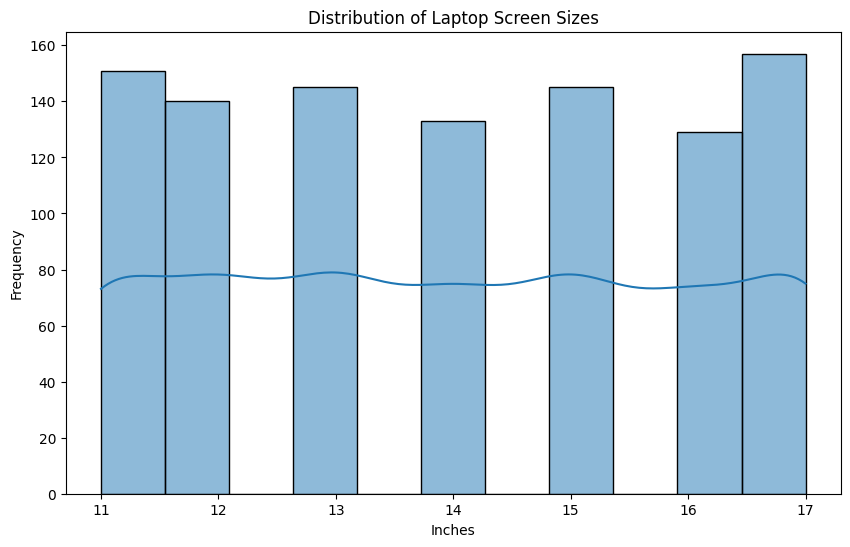

In [15]:
plt.figure(figsize=(10, 6))
bins = int(np.ceil(np.log2(len(df['screen_size']))) + 1)
sns.histplot(df['screen_size'], bins=bins, kde=True)
plt.title("Distribution of Laptop Screen Sizes")
plt.xlabel("Inches")
plt.ylabel("Frequency")
plt.show()

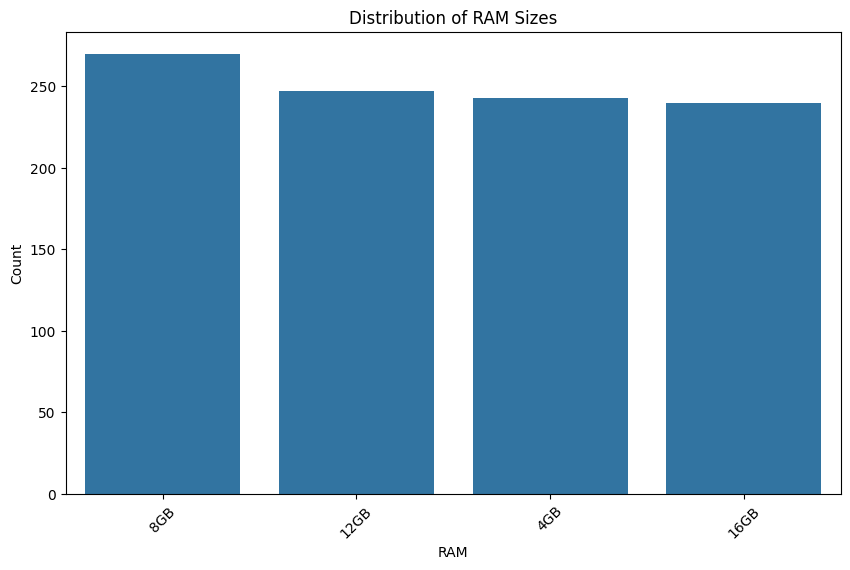

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='ram', order=df['ram'].value_counts().index)
plt.title("Distribution of RAM Sizes")
plt.xlabel("RAM")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

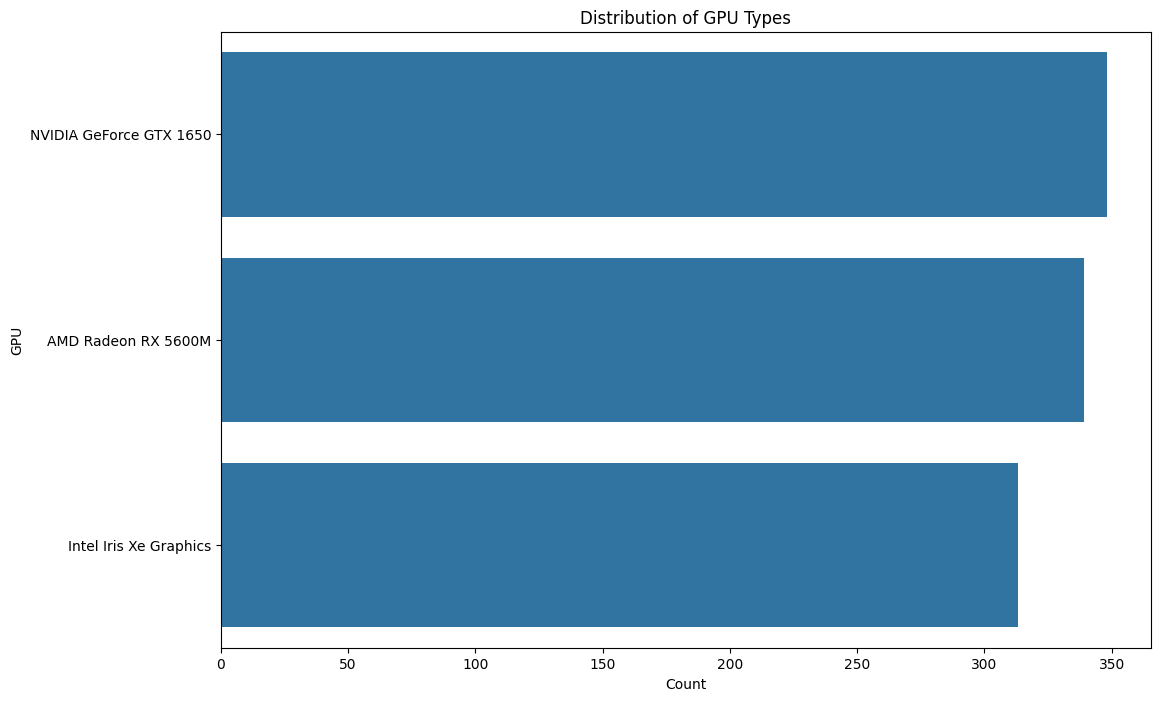

In [18]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='gpu', order=df['gpu'].value_counts().index)
plt.title("Distribution of GPU Types")
plt.xlabel("Count")
plt.ylabel("GPU")
plt.show()

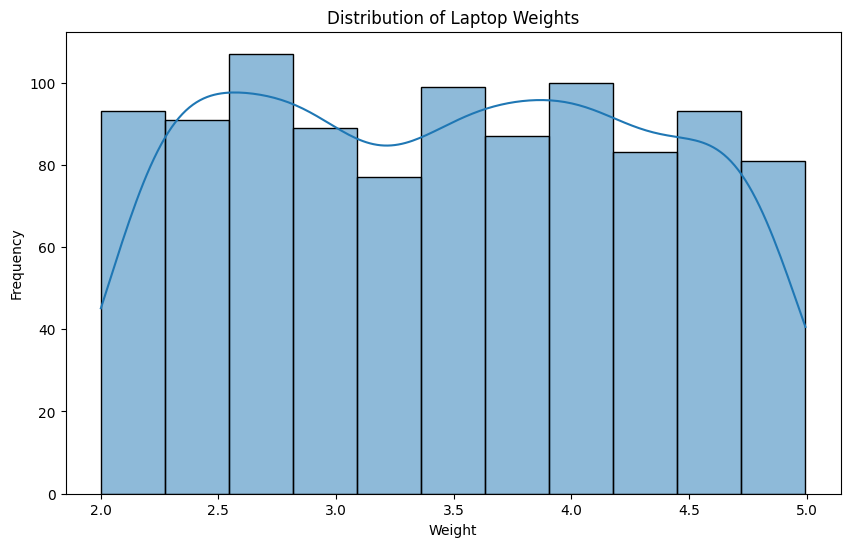

In [22]:
plt.figure(figsize=(10, 6))
bins = int(np.ceil(np.log2(len(df['weight']))) + 1)
sns.histplot(df['weight'], bins=bins, kde=True)
plt.title("Distribution of Laptop Weights")
plt.xlabel("Weight")
plt.ylabel("Frequency")
plt.show()

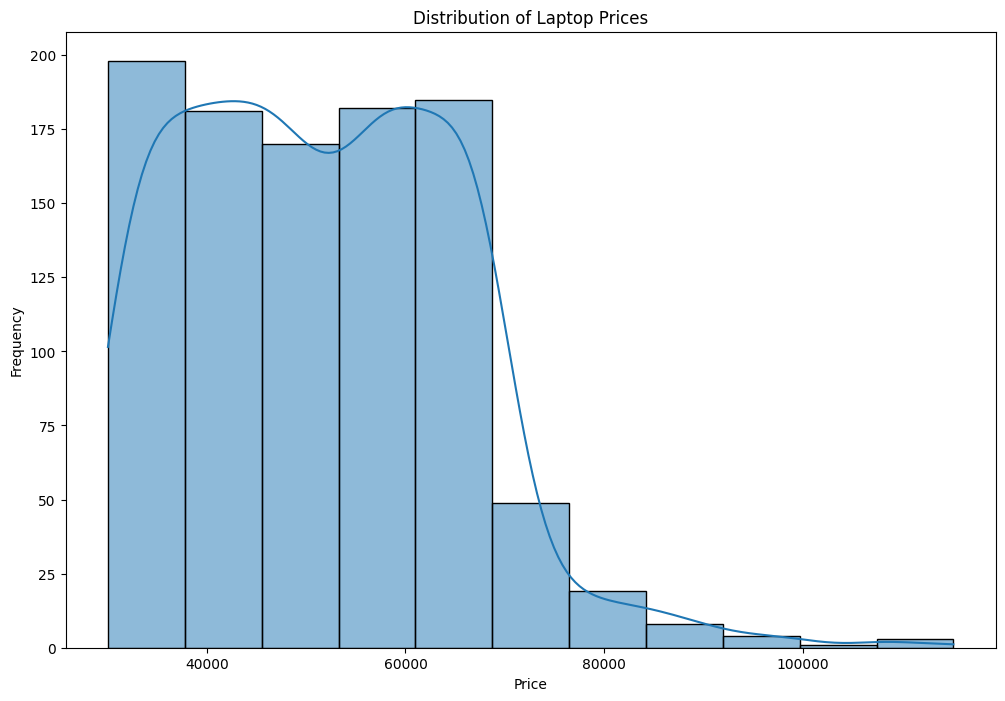

In [24]:
plt.figure(figsize=(12, 8))
bins = int(np.ceil(np.log2(len(df['price']))) + 1)
sns.histplot(df['price'], bins=bins, kde=True)
plt.title("Distribution of Laptop Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# Question 4 : Matrix Manipulation and Polynomial Operations

In [74]:
A = np.matrix('8, -3; 12, 5; 5, 9')
B = np.matrix('11, 10; -6, 15')

np.matmul(A, B), (np.transpose(np.matmul(A, B)) == np.matmul(np.transpose(B), np.transpose(A))).all()

(matrix([[106,  35],
         [102, 195],
         [  1, 185]]),
 True)

In [75]:
p = [5, -4, 0, 0, 3, -2]
q = [0, 0, 1, 0, -4, 3]

product = np.polynomial.polynomial.polymul(p, q)
division, remainder = np.polynomial.polynomial.polydiv(p, q)

print(f"Product of p(x) * q(x): {product}\n\nDivision of p(x) / q(x): {division}\n\nRemainder of p(x) / q(x): {remainder}\n\nRoots of p(x): {np.roots(p)}")

Product of p(x) * q(x): [  0.   0.   5.  -4. -20.  31.  -9.  -2. -12.  17.  -6.]

Division of p(x) / q(x): [-0.66666667]

Remainder of p(x) / q(x): [ 5.         -4.          0.66666667  0.          0.33333333]

Roots of p(x): [-0.60385101+0.6154127j  -0.60385101-0.6154127j   0.65102341+0.58198741j
  0.65102341-0.58198741j  0.7056552 +0.j        ]


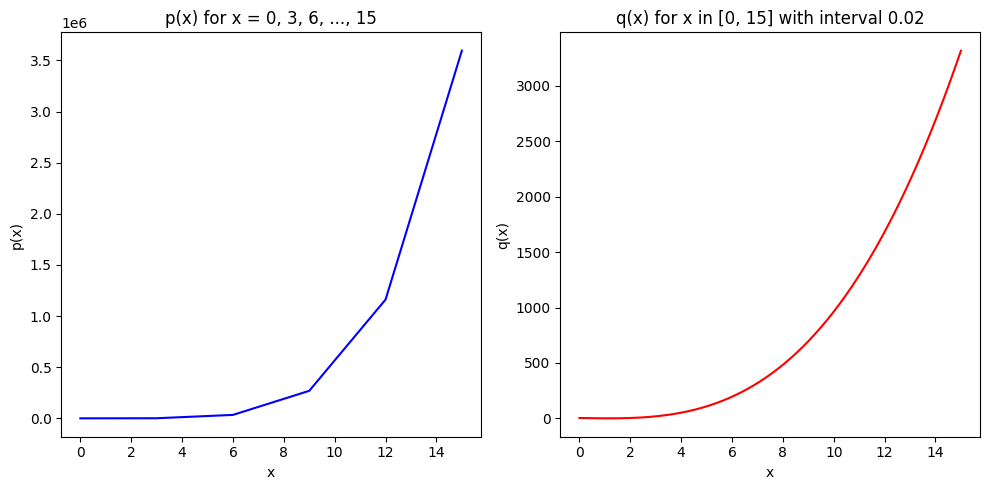

In [52]:
x = np.arange(0, 16, 3)
y = np.polyval(p, x)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(x, y, color='blue')
plt.title('p(x) for x = 0, 3, 6, ..., 15')
plt.xlabel('x')
plt.ylabel('p(x)')


x = np.arange(0, 15.02, 0.02)
y = np.polyval(q, x)

plt.subplot(1, 2, 2)
plt.plot(x, y, color='red')
plt.title('q(x) for x in [0, 15] with interval 0.02')
plt.xlabel('x')
plt.ylabel('q(x)')

plt.tight_layout()
plt.show()

# Question 5 : Advanced Data Manipulation, Plotting and Visualisation

In [61]:
M = np.matrix('2, 3, 4; 5, 6, 7; 8, 9, 10')

V, W = M[:, 2], M[0, :]

print(f"""
Matrix M:
{M}
Vector V: 
{V}
Vector W: 
{W}

Minimum values of each row:
{M.min(1)}
Minimum values of each column:
{M.min(0)}
Maxmimum values of each row:
{M.max(1)}
Maxmimum values of each column:
{M.max(0)}
""")


Matrix M:
[[ 2  3  4]
 [ 5  6  7]
 [ 8  9 10]]
Vector V: 
[[ 4]
 [ 7]
 [10]]
Vector W: 
[[2 3 4]]

Minimum values of each row:
[[2]
 [5]
 [8]]
Minimum values of each column:
[[2 3 4]]
Maxmimum values of each row:
[[ 4]
 [ 7]
 [10]]
Maxmimum values of each column:
[[ 8  9 10]]



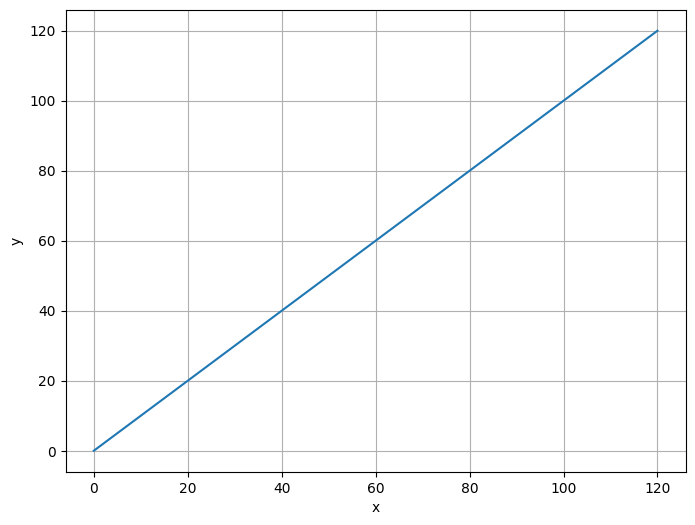

In [62]:
x = np.arange(0, 121)
y = x

plt.figure(figsize=(8, 6))
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

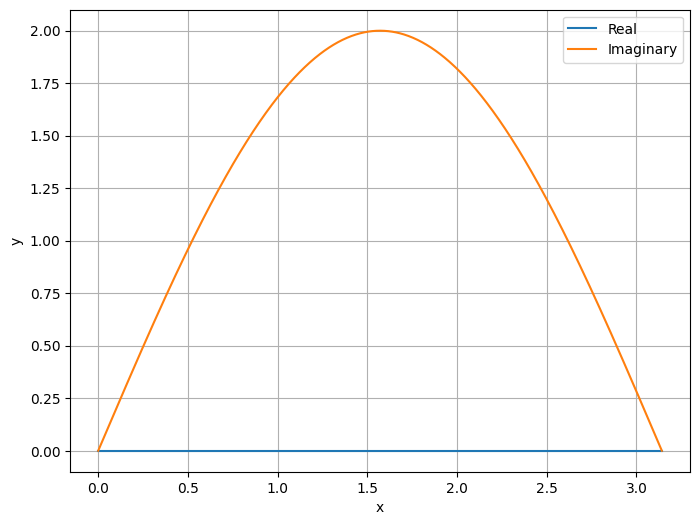

In [68]:
x = np.linspace(0, np.pi, 1000)
y = 2j * np.sin(x)

plt.figure(figsize=(8, 6))
plt.plot(x, y.real, label='Real')
plt.plot(x, y.imag, label='Imaginary')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# Question 6 : Advanced Plotting and Code Efficiency

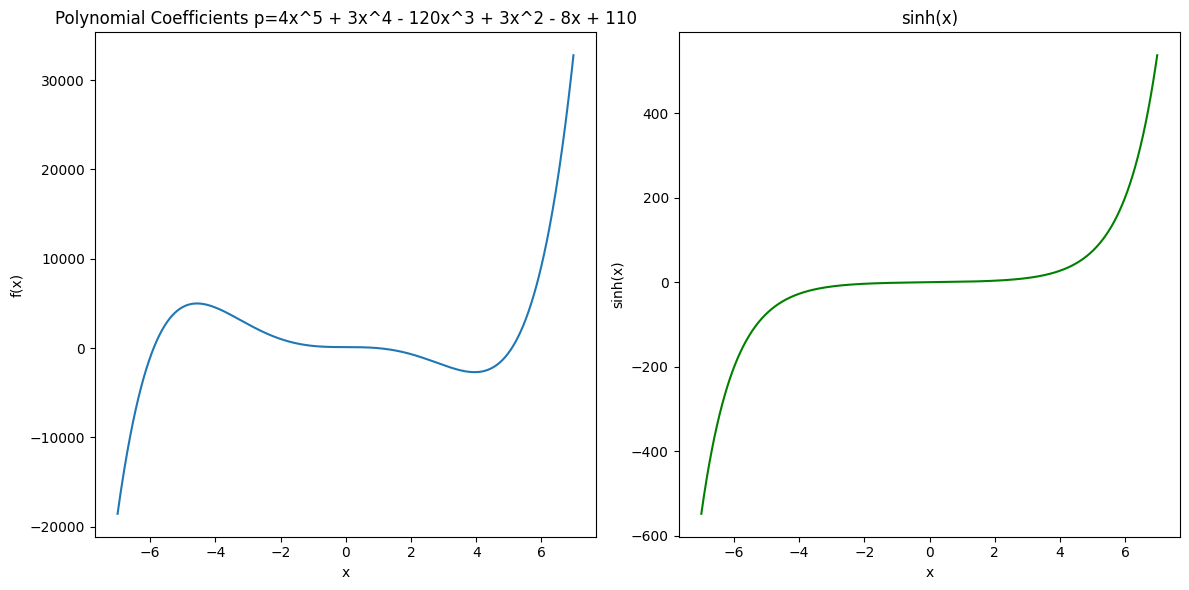

In [70]:
x = np.arange(-7, 7, 0.02)
p = [4, 3, -120, 3, -8, 110]
y = np.polyval(p, x)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Polynomial Coefficients p=4x^5 + 3x^4 - 120x^3 + 3x^2 - 8x + 110')


y = np.sinh(x)
plt.subplot(1, 2, 2)

plt.plot(x, y, color="green")
plt.xlabel('x')
plt.ylabel('sinh(x)')
plt.title('sinh(x)')

plt.tight_layout()
plt.show()

# Question 7 : Vectorisation

In [76]:
X = np.arange(1, 1001)
Y = np.cumsum(X)
Z = np.where(Y % 2 == 0, 'Even', 'Odd')

# Question 8 : Working with Equations

In [99]:
# Constants
R_air = 461  # Gas constant for moist air in J/kg
delta_H_v = 2.453e6  # Latent heat of vaporization for water in J/kg

# Function to calculate saturation vapor pressure (P0)
def saturation_vapor_pressure(T_F):
    T_K = (T_F - 32) * 5 / 9 + 273.15  # Convert Fahrenheit to Kelvin
    ln_P0 = (delta_H_v / R_air) * (1 / 273.15 - 1 / T_K) + np.log(6.11)
    P0 = np.exp(ln_P0)
    return P0


temp = np.arange(-60, 121)
saturation = saturation_vapor_pressure(temp)

data = [temp, saturation]
data_T = list(map(list, zip(*data)))

print(tabulate(data_T, headers=["Temp", "Saturation"], floatfmt=".5f"))

     Temp    Saturation
---------  ------------
-60.00000       0.06896
-59.00000       0.07321
-58.00000       0.07770
-57.00000       0.08244
-56.00000       0.08744
-55.00000       0.09272
-54.00000       0.09829
-53.00000       0.10417
-52.00000       0.11036
-51.00000       0.11690
-50.00000       0.12378
-49.00000       0.13103
-48.00000       0.13867
-47.00000       0.14671
-46.00000       0.15518
-45.00000       0.16409
-44.00000       0.17346
-43.00000       0.18332
-42.00000       0.19370
-41.00000       0.20460
-40.00000       0.21606
-39.00000       0.22811
-38.00000       0.24077
-37.00000       0.25406
-36.00000       0.26802
-35.00000       0.28267
-34.00000       0.29805
-33.00000       0.31419
-32.00000       0.33112
-31.00000       0.34888
-30.00000       0.36751
-29.00000       0.38703
-28.00000       0.40749
-27.00000       0.42893
-26.00000       0.45140
-25.00000       0.47492
-24.00000       0.49956
-23.00000       0.52536
-22.00000       0.55236
-21.00000       

# Question 9 : Processing Data

In [79]:
raw_df = pd.read_excel('./weather_data.xls', index_col=0, skiprows=7)
pd.options.display.max_columns = raw_df.shape[1]
raw_df

,Day 1,Day 2,Day 3,Day 4,Day 5,Day6,Day 7,Day 8,Day 9,Day 10,Day 11,Day 12,Day 13,Day 14,Day 15,Day 16,Day 17,Day 18,Day 19,Day20,Day21,Day22,Day23,Day24,Day25,Day26,Day 27,Day 28,Day 29,Day 30,Day 31
1999,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
January,0,0,272,0,0,12,0,272,0,0,0,0,12,0,272,1,0,0,1,1,0,0,33,33,1,1,1,0,0,33,33
Fenruary,61,103,0,2,23,1,103,0,2,23,2,23,1,103,0,0,62,-99999,0,0,62,-99999,-99999,-99999,0,0,12,62,-99999,-99999,-99999
March,2,0,17,27,0,2,0,17,27,0,27,0,2,0,17,6,0,5,9,0,0,5,8,0,9,0,0,0,5,8,0
April,260,1,0,0,0,0,1,0,0,0,0,0,0,1,0,7,13,86,5,1,13,86,0,-9999,5,1,0,13,86,0,-9999
May,47,0,0,0,4,56,0,0,0,4,0,4,56,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,0,0
June,0,0,30,42,8,0,0,30,42,8,42,8,0,0,30,1,14,14,12,0,14,14,8,-99999,12,0,0,14,14,8,-99999
July,0,0,0,0,12,0,0,0,0,12,0,12,0,0,0,23,5,0,0,-99999,5,0,0,0,0,-99999,0,5,0,0,0
August,0,45,0,0,0,23,45,0,0,0,0,0,23,45,0,0,0,0,-99999,13,0,0,0,0,-99999,13,-99999,0,0,0,0
September,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,138,58,7,0,138,58,10,-99999,7,0,0,138,58,10,-99999


In [81]:
raw_df.describe()

,Day 1,Day 2,Day 3,Day 4,Day 5,Day6,Day 7,Day 8,Day 9,Day 10,Day 11,Day 12,Day 13,Day 14,Day 15,Day 16,Day 17,Day 18,Day 19,Day20,Day21,Day22,Day23,Day24,Day25,Day26,Day 27,Day 28,Day 29,Day 30,Day 31
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,30.916667,26.000000,27.000000,7.083333,8.250000,9.000000,26.000000,27.000000,7.083333,8.250000,7.083333,8.250000,9.000000,26.000000,27.000000,-7.916667,19.333333,-8319.666667,-8328.916667,-8331.416667,19.333333,-8319.666667,-8328.333333,-34163.416667,-8328.916667,-8331.416667,-8331.166667,19.333333,-8319.666667,-8328.333333,-34163.416667
std,75.115013,53.165265,77.723285,13.787071,13.518506,16.348478,53.165265,77.723285,13.787071,13.518506,13.787071,13.518506,16.348478,53.165265,77.723285,28.490695,41.333089,28871.515910,28868.589771,28867.802412,41.333089,28871.515910,28868.774708,48704.594365,28868.589771,28867.802412,28867.881135,41.333089,28871.515910,28868.774708,48704.594365
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-77.000000,0.000000,-99999.000000,-99999.000000,-99999.000000,0.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,0.000000,-99999.000000,-99999.000000,-99999.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-99999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-99999.000000
50%,0.000000,0.000000,0.000000,0.000000,2.000000,1.500000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,1.500000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
75%,13.250000,12.000000,8.000000,5.000000,9.000000,8.250000,12.000000,8.000000,5.000000,9.000000,5.000000,9.000000,8.250000,12.000000,8.000000,2.250000,13.250000,7.250000,9.000000,1.000000,13.250000,7.250000,8.000000,0.000000,9.000000,1.000000,1.000000,13.250000,7.250000,8.000000,0.000000
max,260.000000,163.000000,272.000000,42.000000,45.000000,56.000000,163.000000,272.000000,42.000000,45.000000,42.000000,45.000000,56.000000,163.000000,272.000000,23.000000,138.000000,86.000000,12.000000,13.000000,138.000000,86.000000,33.000000,33.000000,12.000000,13.000000,12.000000,138.000000,86.000000,33.000000,33.000000


In [84]:
df = raw_df.copy()
# Ensure that all values are positive
df = df.abs()
# Mark abnormal values as null 
df[df > 900] = np.nan
# Correct misspelled month
df.rename(index={'Fenruary': 'February'}, inplace=True)
df

,Day 1,Day 2,Day 3,Day 4,Day 5,Day6,Day 7,Day 8,Day 9,Day 10,Day 11,Day 12,Day 13,Day 14,Day 15,Day 16,Day 17,Day 18,Day 19,Day20,Day21,Day22,Day23,Day24,Day25,Day26,Day 27,Day 28,Day 29,Day 30,Day 31
1999,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
January,0,0,272,0,0,12,0,272,0,0,0,0,12,0,272,1,0,0.0,1.0,1.0,0,0.0,33.0,33.0,1.0,1.0,1.0,0,0.0,33.0,33.0
February,61,103,0,2,23,1,103,0,2,23,2,23,1,103,0,0,62,NaN,0.0,0.0,62,NaN,NaN,NaN,0.0,0.0,12.0,62,NaN,NaN,NaN
March,2,0,17,27,0,2,0,17,27,0,27,0,2,0,17,6,0,5.0,9.0,0.0,0,5.0,8.0,0.0,9.0,0.0,0.0,0,5.0,8.0,0.0
April,260,1,0,0,0,0,1,0,0,0,0,0,0,1,0,7,13,86.0,5.0,1.0,13,86.0,0.0,NaN,5.0,1.0,0.0,13,86.0,0.0,NaN
May,47,0,0,0,4,56,0,0,0,4,0,4,56,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,9.0,0,0.0,0.0,0.0
June,0,0,30,42,8,0,0,30,42,8,42,8,0,0,30,1,14,14.0,12.0,0.0,14,14.0,8.0,NaN,12.0,0.0,0.0,14,14.0,8.0,NaN
July,0,0,0,0,12,0,0,0,0,12,0,12,0,0,0,23,5,0.0,0.0,NaN,5,0.0,0.0,0.0,0.0,NaN,0.0,5,0.0,0.0,0.0
August,0,45,0,0,0,23,45,0,0,0,0,0,23,45,0,0,0,0.0,NaN,13.0,0,0.0,0.0,0.0,NaN,13.0,NaN,0,0.0,0.0,0.0
September,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,138,58.0,7.0,0.0,138,58.0,10.0,NaN,7.0,0.0,0.0,138,58.0,10.0,NaN


In [90]:
year = df.index.name
months = df.index
days = df.columns

precipitation_per_month = list(zip(months, df.sum(axis=1)))
precipitation_per_day = list(zip(days, df.sum(axis=0)))
total_precipitation = sum(total for _, total in precipitation_per_month)
average_precipitation = total_precipitation / len(months)

print(f'\na)\tTotal precipitation in each month:\n')
print(tabulate(precipitation_per_month, headers=['Month', 'Total Precipitation (mm)']))
print(f'\nb)\tTotal precipitation recorded for year {year}: {total_precipitation} mm')
print(f'\nc)\tThe month that record the maximum precipitation during the year: {max(precipitation_per_month, key=lambda x: x[1])}')
print(f'\tThe day that record the maximum precipitation during the year: {max(precipitation_per_day, key=lambda x: x[1])}')
print(f'\nd)\tThe average precipitation for year {year}: {average_precipitation:.2f}')


a)	Total precipitation in each month:

Month        Total Precipitation (mm)
---------  --------------------------
January                           978
February                          645
March                             193
April                             579
May                               180
June                              365
July                               74
August                            207
September                         622
October                           115
November                          750
December                           54

b)	Total precipitation recorded for year 1999: 4762.0 mm

c)	The month that record the maximum precipitation during the year: ('January', 978.0)
	The day that record the maximum precipitation during the year: ('Day 1', 371.0)

d)	The average precipitation for year 1999: 396.83


# Question 10 : FFT Applied to Images

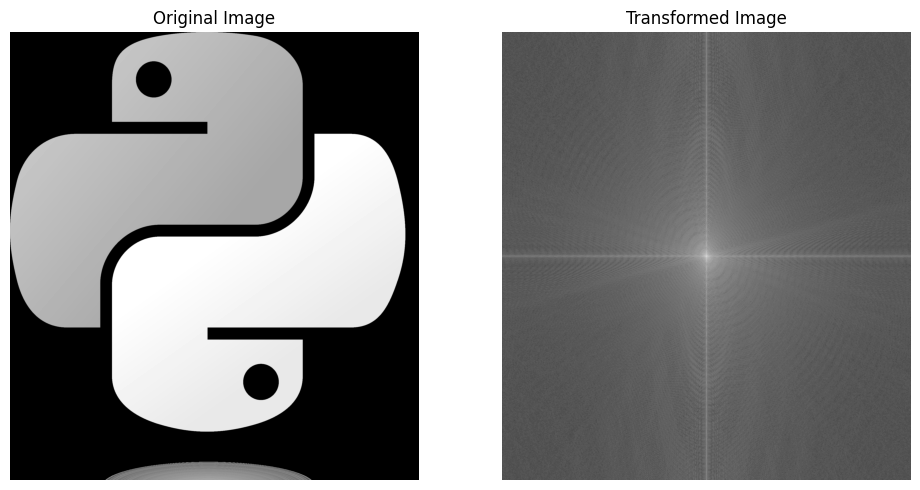

In [93]:
# Import image
image = plt.imread('./python.png')
# Transform image to grayscale
grayscale_image = np.mean(image, axis=2)

fft_image = np.fft.fft2(grayscale_image)
fft_shifted = np.fft.fftshift(fft_image)
log_abs_fft = np.log(np.abs(fft_shifted))

plt.figure(figsize=(10, 5))

# Plot grayscale image
plt.subplot(1, 2, 1)
plt.imshow(grayscale_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Plot transformed image
plt.subplot(1, 2, 2)
plt.imshow(log_abs_fft, cmap='gray')
plt.title('Transformed Image')
plt.axis('off')

plt.tight_layout()
plt.show()